Value of k is  1.0
Codebook vector for k=1


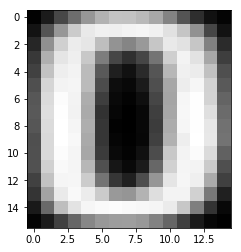

Value of k is  2.0
In codebook function
Cluster length is 100
Cluster length is 137


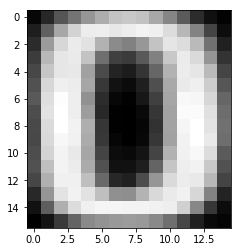

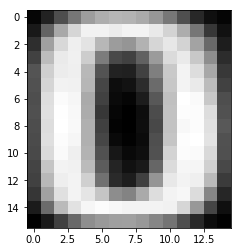

Value of k is  3.0
In codebook function
Cluster length is 66
Cluster length is 85
Cluster length is 98


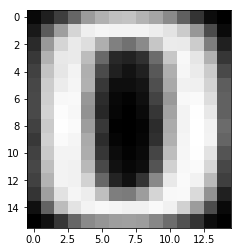

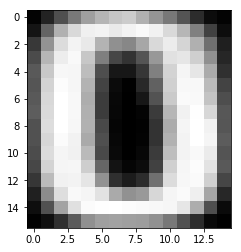

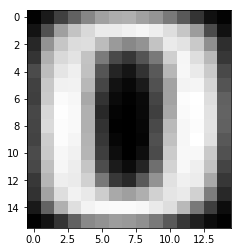

Value of k is  200.0
Images for k=200


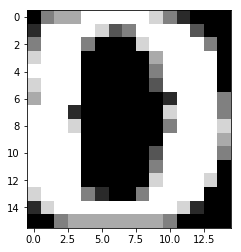

Images for k=200


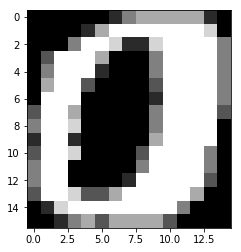

Images for k=200


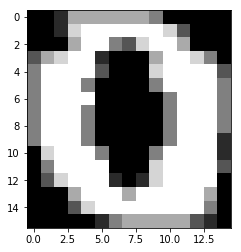

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

data=open("E:\DE\Sem2\MachineLearning\Miniproject_1\DigitsBasicRoutines\DigitsBasicRoutines\mfeat-pix.txt","r")
zero=[]                                #list of all zero digit images
for i in range(0,200):
    line=np.asarray(data.readline().strip().split('  '))     #removing space at the start of each record
    zero.append(line)
data2=np.zeros((200,240))
for j in range(200):             # the 200 images
    for k in range(240):          # length of pixels
        data2[j][k]=float(zero[j][k])                        #converting numbers to float. Imp for image plotting
#print (data2[0][:])
#print (type(data2))
rand_nos=[]


def reassign(codebook_list,cluster_list):           # function for cluster update after initial assignment
    for clus_no in range(len(cluster_list)):        # for each cluster in cluster list   
        clus=cluster_list[clus_no]
        indicator=0
        clus_len=len(clus)
        print ("Cluster length is",clus_len)
        for vec in range(len(clus)):                # foreach vector in a cluster
            dist_list=[]  
        #    vec+=1
            for cdbk in range(len(codebook_list)):  # codebook vector within codebook vector list
                vec_dis=distance.euclidean(codebook_list[cdbk],clus[vec])  #distance calculation for each vector with 'k' codebook vectors
                dist_list.append(vec_dis)           # list with codebook vectors 
            #print ("Distance list is ",dist_list)
            index=np.argmin(dist_list)              # Cluster index with minimum dist of above vector with codebook vector
            cluster_list[index].append(clus[vec]) #if not to right cluster, shifting of vector
            vec_dist=0.0                            #emptying  variables
            #print ("Index of minimum distance is",index)
            index=0
            dist_list=[]
    return (cluster_list)                          # returning updated cluster list

def codebook(k_list,k_value):                      # function to calculate codebook vector
    print ("In codebook function")
    no_cluster=len(k_list)                         # l=number of clusters for a particular k
    if(no_cluster==k_value):
        #print ("yes")
        cd_list=[]
        for cluster in range(no_cluster):          # calculating codebook vector within a cluster
            cd_vec=np.sum(k_list[cluster],axis=0)/len(k_list[cluster])  # formula for codebook vector calculation
            cd_list.append(cd_vec)                 # formation of codebook vector list
        reassign_cl_li=reassign(cd_list,k_list)    # calling function for reassigning vectors to clusters
        if((k_list==reassign_cl_li)==False):      # stopping criteria for reassignment of vectors to clusters
            print ("k-list updated")
            k_list=reassign_cl_li
            codebook(k_list,k_value)
        else:
            for codebook_vectors in range(len(cd_list)):  # plotting codebook vectors for clusters
                #print (cd_vec)
                img2=cd_list[codebook_vectors].reshape(16,15)
                plt.imshow(img2,cmap='gray')
                plt.show()
                
def two_hundred(k,data2):                        # function for k=200, plotting forst 3 images
    for lin in range(0,3):
        print ("Images for k=200")
        img_k200=data2[lin].reshape(16,15)
        plt.imshow(img_k200,cmap='gray')
        plt.show()
            

def code(k):                                     # function for initial random assignment of vectors to clusters
    "steps for every k"
    print ("Value of k is ", k)
    rand_nos=np.random.randint(0,200,200)       # 200 random number generation between 0,200
    len_rand=len(rand_nos)
    #print (len_rand)
    #
    cl1_k1=[]
    cl1_k2=[]
    cl2_k2=[]
    cl1_k3=[]
    cl2_k3=[]
    cl3_k3=[]
    # initial random assignment of data points
    for i in range(len_rand):                   # loop for random indices
        r_no=rand_nos[i]                        # random number from list  
        #print (r_no)
        if(k==1.):
            #print ("When Value of k is 1")
            cl1_k1.append(data2[r_no])          # appending the random data entry to a cluster
            k1_list=cl1_k1 
        
        if(k==2.):                              # for k=2, initial random 2 clusters of length 100
            #print ("When Value of k is 2")
            if(len(cl1_k2)<100):                  
                cl1_k2.append(data2[r_no])      # appending the random data entry to a cluster
            else:
                cl2_k2.append(data2[r_no])      # appending the random data entry to a cluster
            k2_list=[cl1_k2,cl2_k2]             # cluster list for k=2
            
        if(k==3.):
            #print ("When Value of k is 3")     # for k=3, initial random 3 clusters of length 66,66,68
            if(len(cl1_k3)<66):
                cl1_k3.append(data2[r_no])      # appending the random data entry to a cluster
            elif(len(cl2_k3)<66):
                cl2_k3.append(data2[r_no])      # appending the random data entry to a cluster
            else:
                cl3_k3.append(data2[r_no])      # appending the random data entry to a cluster
            k3_list=[cl1_k3,cl2_k3,cl3_k3]      # cluster list for k=3
    
    if(k==1):                                   # for k=1, calculating and plotting codebook vector
    # Codebook vector for k=1
        print ("Codebook vector for k=1")
        codebook_vector=(np.sum(cl1_k1,axis=0))/len(cl1_k1)
        img=codebook_vector.reshape(16,15)
        plt.imshow(img,cmap='gray')
        plt.show()
        
    if(k==2.):
        codebook(k2_list,k)                    # calling codebook function
    if(k==3.):
        codebook(k3_list,k)                    # calling codebook function
    
    if(k==200.):
        two_hundred(k,data2)                   # calling two_hundred function  
  
    
k_val=[1.0,2.,3.,200.]                               # list of k-values
for i in range(len(k_val)):
    k=k_val[i]
    code(k)                                   # calling function for cluster initialization
    
